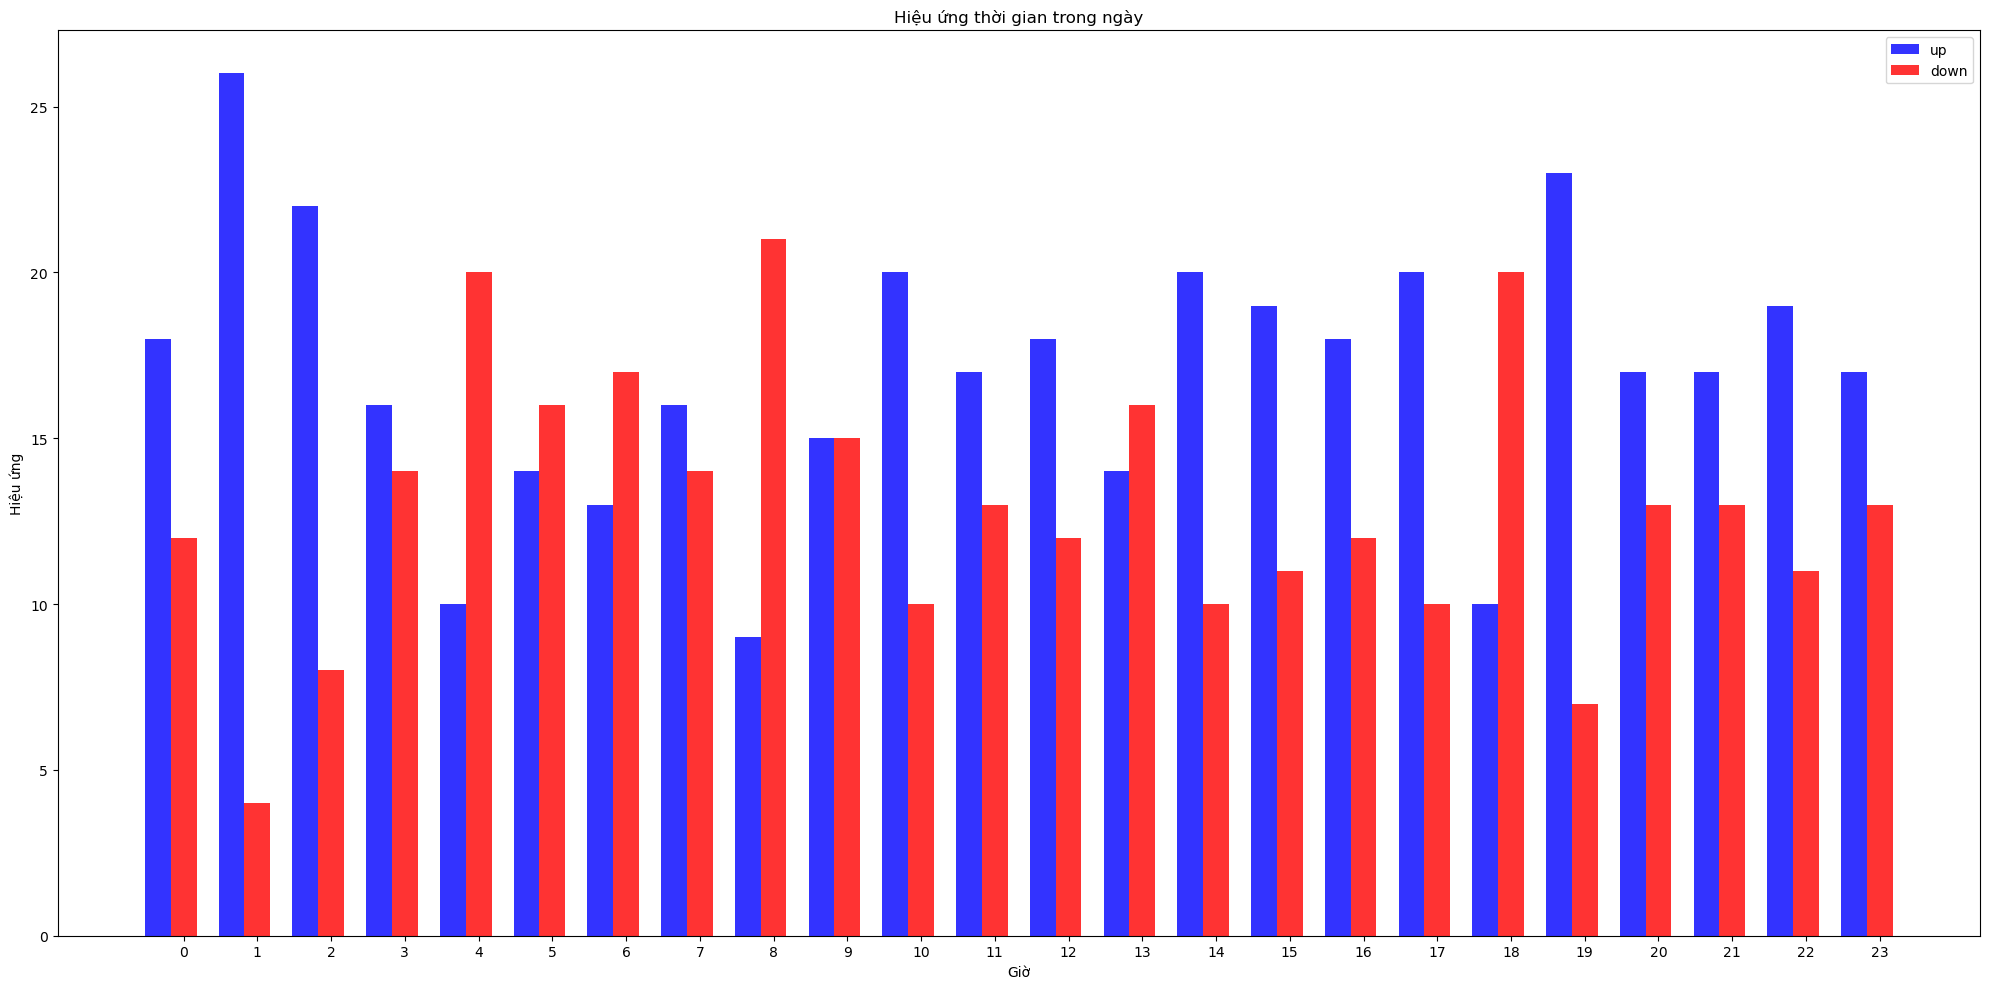

Giờ 8
________________________________
count    9.000000
mean     0.630931
std      0.766993
min      0.000000
25%      0.097418
50%      0.489956
75%      0.718533
max      2.464431
Name: hour_return, dtype: float64
5.678378778826318
+++
count    21.000000
mean     -0.629063
std       0.493662
min      -1.719479
25%      -0.909349
50%      -0.437637
75%      -0.258264
max      -0.058703
Name: hour_return, dtype: float64
-13.210323359386658
type_continuous
0     378
2     174
3      84
4      44
5      19
6       9
7       3
8       3
9       1
10      1
11      1
12      1
13      1
14      1
dtype: int64


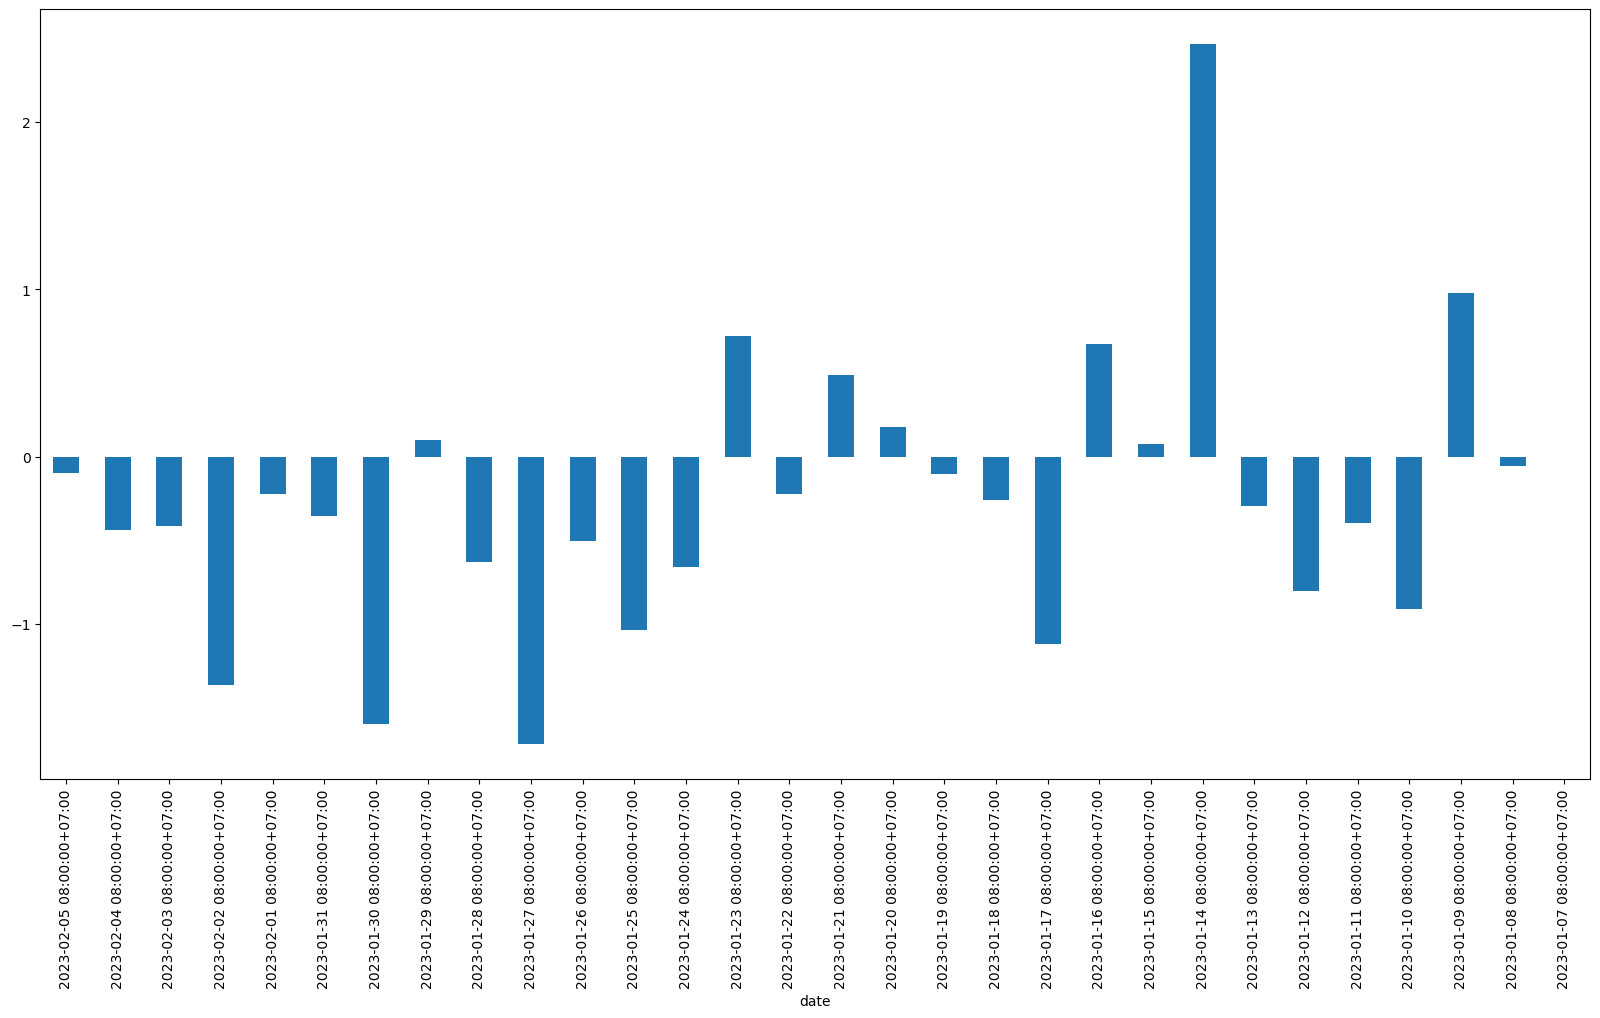

<Figure size 1000x1000 with 0 Axes>

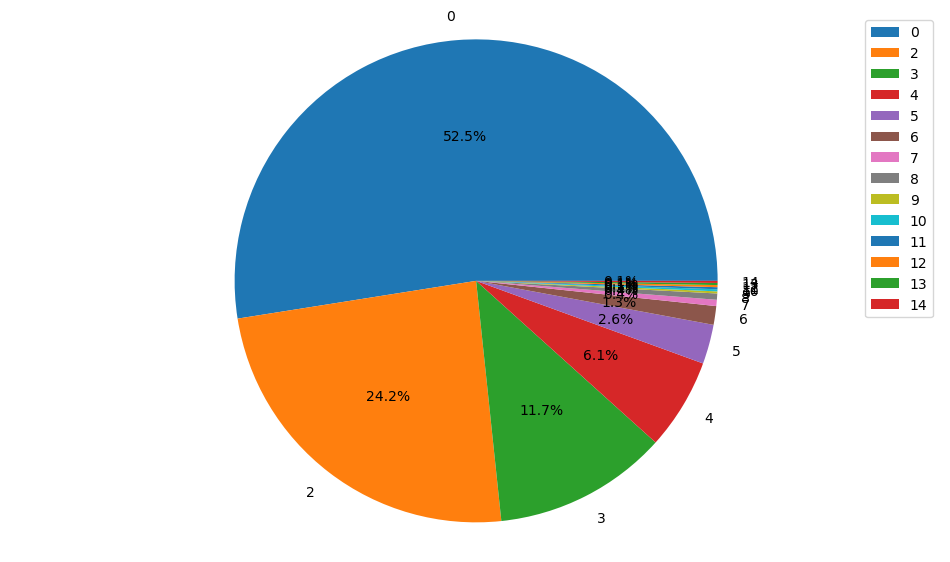

In [8]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('XRPUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*30, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')
# candlestick_day = Candlestick(merchandise_rate_id, 'day', 100, "DESC")
hour_observe = 8

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
# data_prices['type_21'] = candlestick_type_by_hour(data_prices, 21)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 7)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 12)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 13)

data_prices['type_continuous'] = type_continuous(data_prices)

# data_prices['until_now'] = until_now_type(data_prices)



bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()






type_continuous
0     1267
2      604
3      281
4      138
5       56
6       27
7       10
8        8
9        3
10       2
11       1
12       1
13       1
14       1
dtype: int64


<Figure size 1000x1000 with 0 Axes>

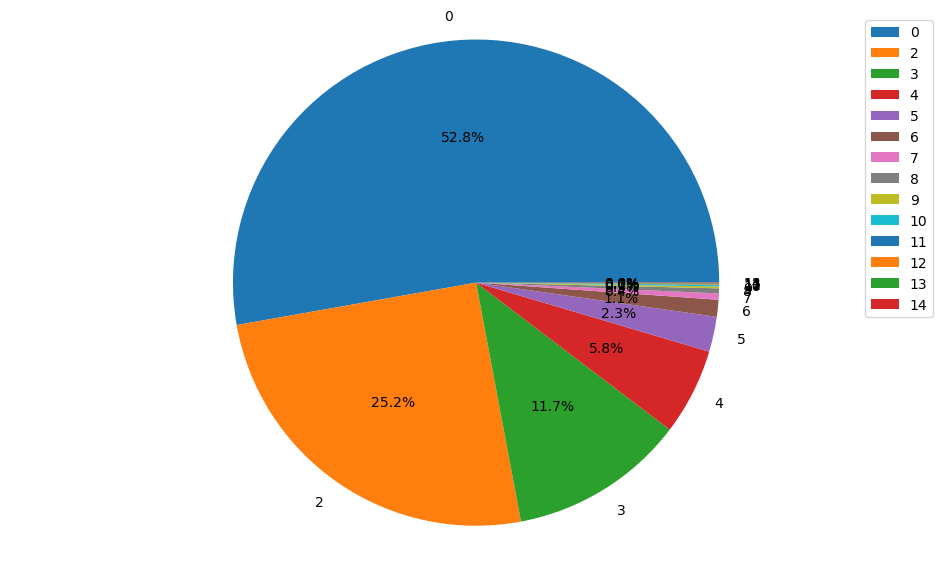

In [6]:
# data_prices['type_continuous'].hist(bins=20)

type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()




In [ ]:
data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')
# data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

print("___________________________**KÊT QUẢ**___________________________")
print(f"Tỉ lệ up/down: {data_prices_up.count()} - {data_prices_down.count()}")
print(f"Tổng up = {data_prices_up['hour_return'].sum()}")
print(f"Tổng down = {data_prices_down['hour_return'].sum()}")

<AxesSubplot:xlabel='date'>

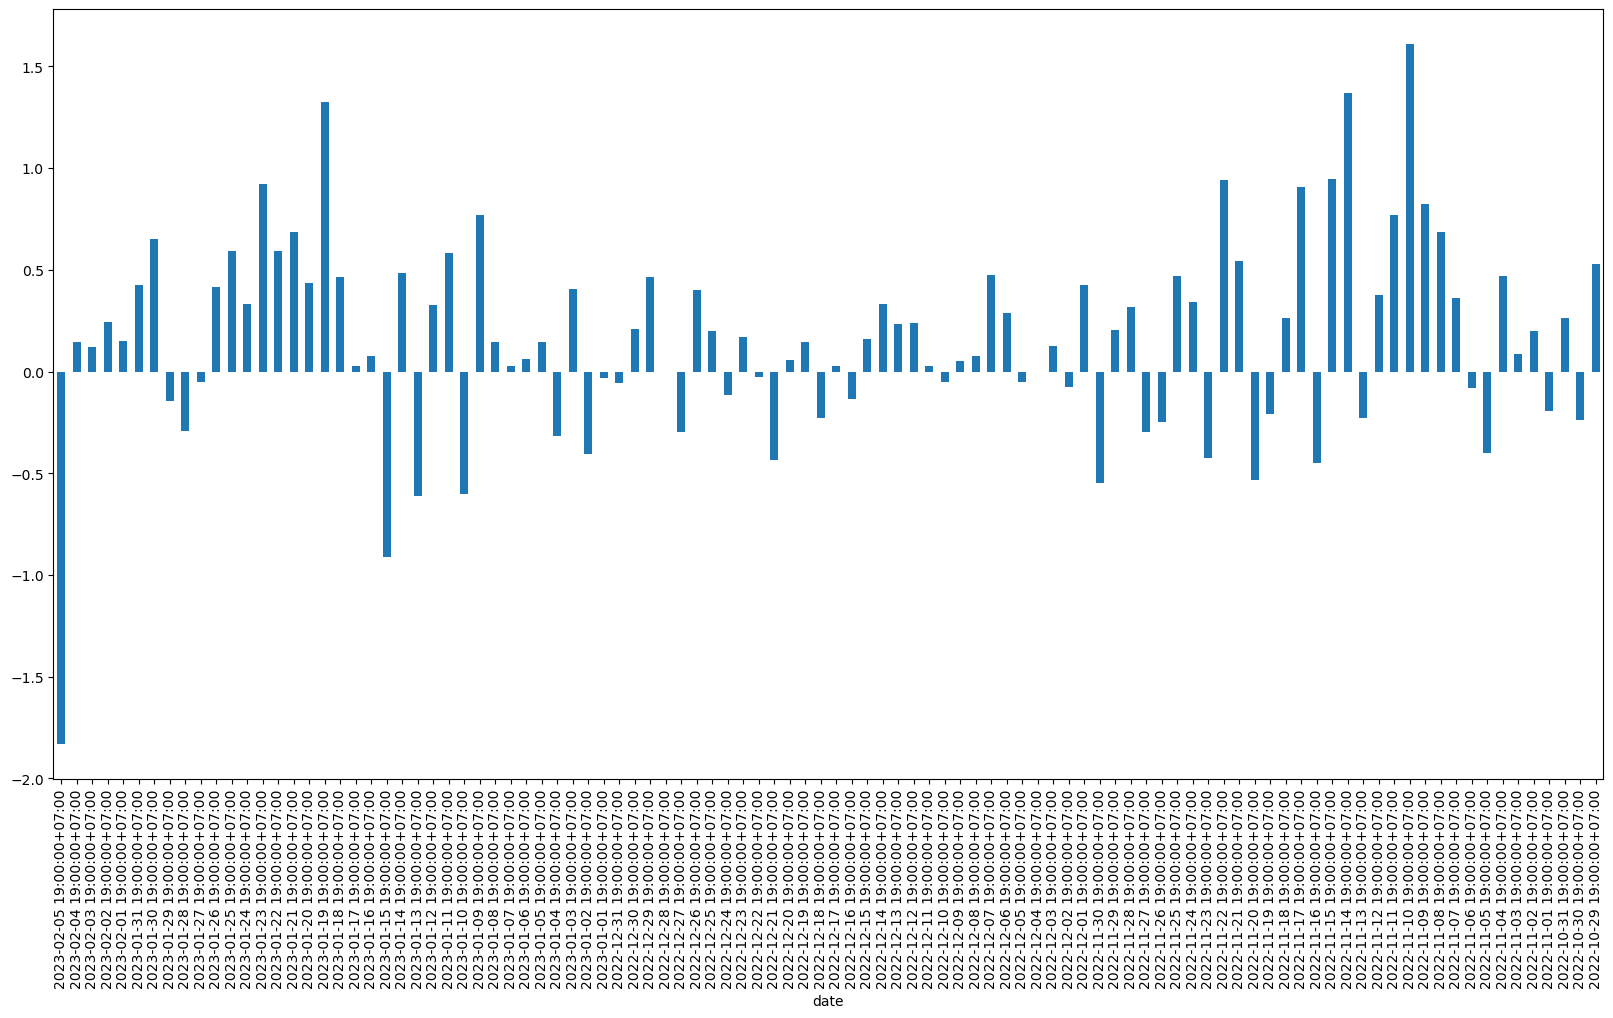

In [7]:
data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')

In [ ]:
data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

In [ ]:
data_prices[data_prices['hour_return']==data_prices['hour_return'].max()]


In [ ]:
def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()



In [ ]:

list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()




In [ ]:
type_observe = 'down'

data_prices_h7 = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == type_observe)]

hour_correlate = {
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0,
    '10': 0,
    '11': 0,
    '12': 0,
    '13': 0,
    '14': 0,
    '15': 0,
    '16': 0,
    '17': 0,
    '18': 0,
    '19': 0,
    '20': 0,
    '21': 0,
    '22': 0,
    '23': 0
}

for value in data_prices_h7['day'].to_list():
    for i in np.arange(24):
        if i == hour_observe:
            continue;
        hour_type = data_prices[(data_prices['day']  == value) & (data_prices['hour'] == i)].type

        if hour_type.values.size > 0 and hour_type.values == [type_observe]:
            hour_correlate[f"{i}"] = hour_correlate[f"{i}"] + 1
            
hour_correlate[f"{hour_observe}"] = len(data_prices_h7)

list_hours = [int(hour) for hour in hour_correlate.keys()]
list_correlate = hour_correlate.values()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_correlate, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_correlate)

plt.show()



In [ ]:
data_prices_20 = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_20['type_continuous_20'] = type_continuous(data_prices_20,'ASC')

print(data_prices_20)




In [ ]:
from myenv.helpers.utils import phi_coefficient

print(phi_coefficient(data_prices_20, 'type', 'type_7'))

In [ ]:
import pandas as pd
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*1000, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')
# candlestick_day = Candlestick(merchandise_rate_id, 'day', 100, "DESC")
hour_observe = 20

data_prices = candlestick.to_df()

data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)
data_prices['type'] = candlestick_type(data_prices)


down_df = data_prices[data_prices['type'] == 'down'].groupby(['day'])['type'].size().reset_index(name='count_down')
up_df = data_prices[data_prices['type'] == 'up'].groupby(['day'])['type'].size().reset_index(name='count_up')

a = pd.merge(down_df, up_df, on=["day"])

